In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import asyncio
from time import time
import os
import matplotlib.pyplot as plt
import pandas as pd

from downloader import Downloader, load_hlc_cache
from procedures import create_binance_bot_spot, create_bitget_bot, \
    prepare_backtest_config
from pure_funcs import get_template_live_config, get_dummy_settings

using numba


In [3]:
plt.rcParams["figure.figsize"] = [21, 13]
pd.set_option("display.precision", 10)

In [4]:
async def get_data(symbol_="TRBUSDT", start_date_="2023-10-13", end_date_="2023-10-16"):
    class Args:
        def __init__(self):
            self.backtest_config_path = "configs/backtest/myconfig_v02.hjson"
            self.exchange = "bitget"
            self.symbols = symbol_
            self.market_type = "futures"
            self.user = "bitget_01"
            self.start_date = start_date_
            self.end_date = end_date_
            self.starting_balance = 1000.0
            self.starting_configs = ""
            self.base_dir = "backtests"
            self.ohlcv = "y"  # set to "n" to use 1s candles

    config = prepare_backtest_config(Args())

    config["adg_n_subdivisions"] = 20  # see configs/backtest/default.hjson for details
    config["inverse"] = False
    sts = time()
    if config["ohlcv"]:
        data = await load_hlc_cache(
            config["symbol"],
            config["inverse"],
            config["start_date"],
            config["end_date"],
            base_dir=config["base_dir"],
            spot=config["spot"],
            exchange=config["exchange"],
        )
        prices = data[:, 3]
        highs = data[:, 1]
        lows = data[:, 2]
        closes = data[:, 3]
    else:
        downloader = Downloader(config)
        data = await downloader.get_sampled_ticks()
        prices = data[:, 2]
        highs = data[:, 2]
        lows = data[:, 2]
        closes = data[:, 2]
    timestamps = data[:, 0]
    config["n_days"] = (timestamps[-1] - timestamps[0]) / (1000 * 60 * 60 * 24)

    print(f"millis to load {len(prices)} ticks {(time() - sts) * 1000:.0f}ms")
    return prices, highs, lows, closes, timestamps

In [5]:
prices, highs, lows, closes, timestamps = await get_data(symbol_="TRBUSDT", start_date_="2023-10-13",
                                                         end_date_="2023-10-16")
volatility = (highs - lows) / prices
volatility

fetching market_specific_settings for TRBUSDT...
TRBUSDT most n days of consecutive identical ohlcvs: 0.000, index last: 0
millis to load 4321 ticks 2ms


array([0.00206203, 0.00167297, 0.00110901, ..., 0.00083149, 0.00103873,
       0.00110903])

<AxesSubplot:title={'center':'Coin Price'}, xlabel='Time', ylabel='Price'>

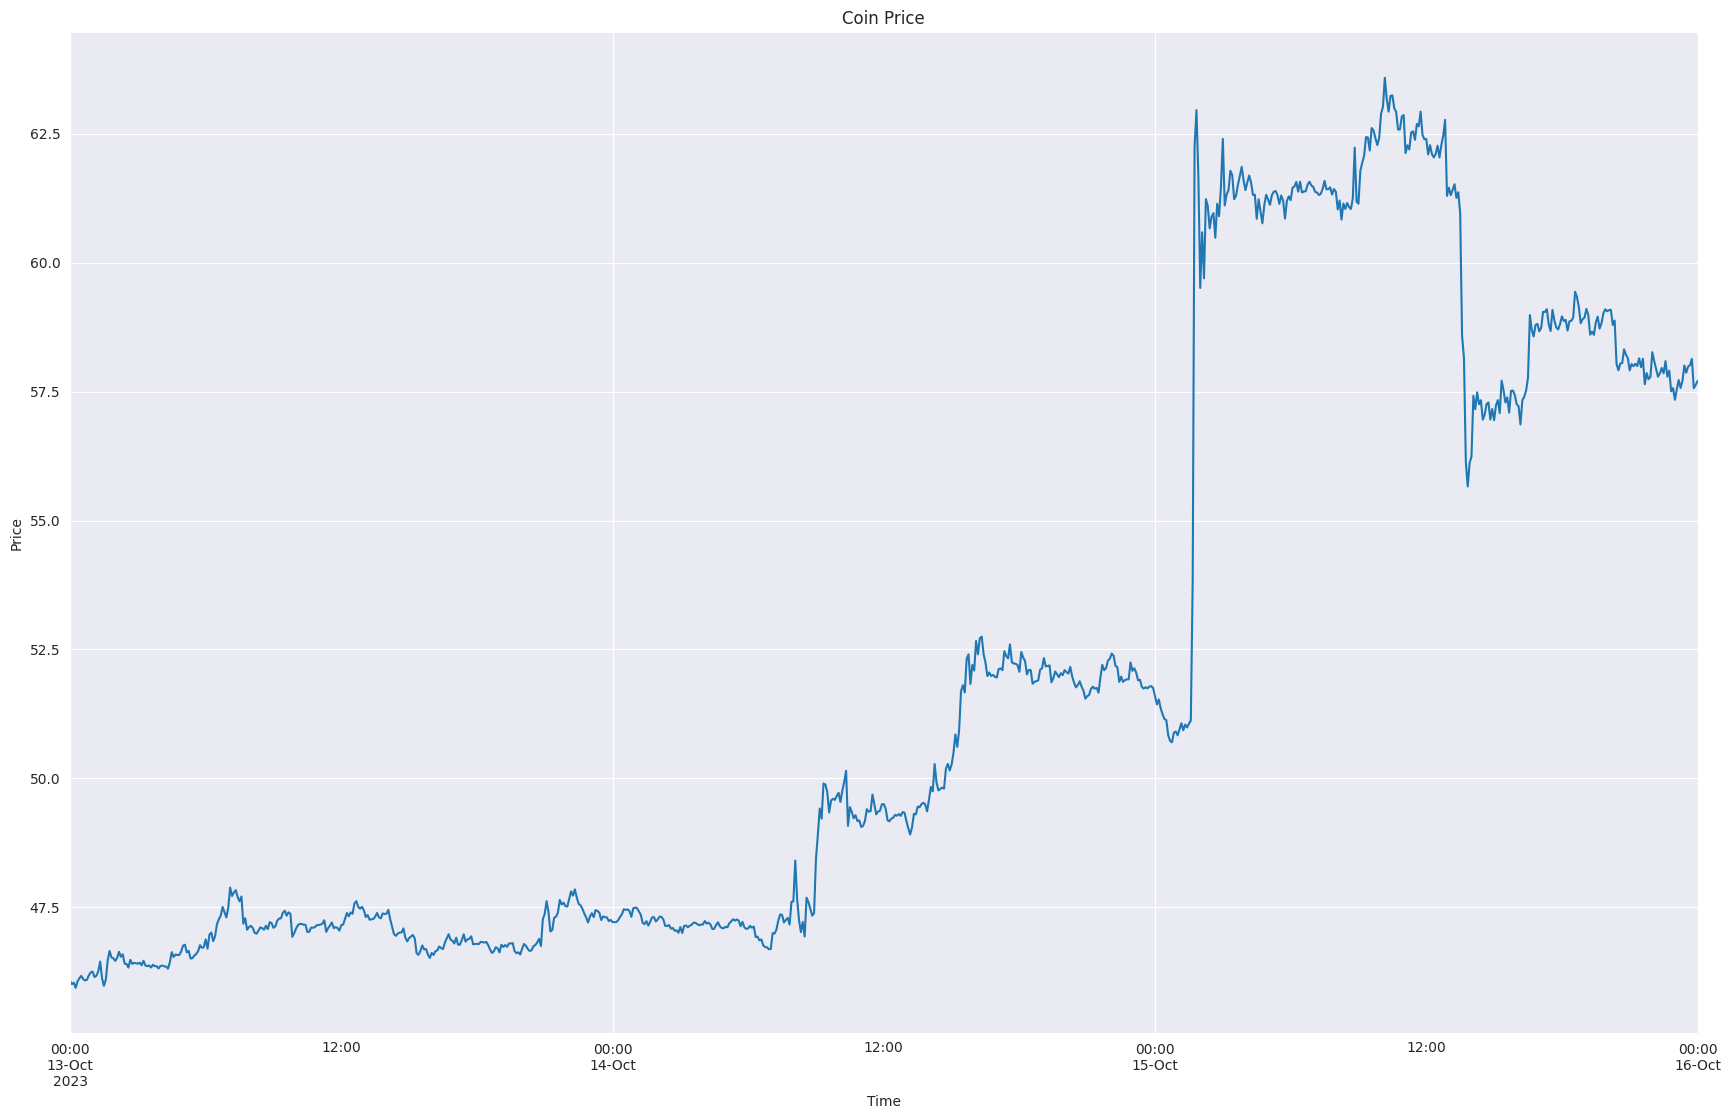

In [6]:
df = pd.DataFrame({"timestamp": timestamps, "price": prices}).set_index("timestamp")
df2 = pd.DataFrame({"timestamp": pd.to_datetime(timestamps, unit='ms'), "price": prices}).set_index("timestamp")
df2.price.iloc[::5].plot(title="Coin Price", xlabel="Time", ylabel="Price")

In [7]:
folder_path = "/home/tdb/git/passivbot/configs/live/multisymbol/recursive_grid"

symbols = [x.split(".")[0] for x in os.listdir(folder_path)]
data_dict = {}
failed_symbols = []
for s in symbols:
    try:
        data_dict[s] = await get_data(symbol_=s, start_date_="2021-10-13", end_date_="2024-01-08")
    except Exception as e:
        print(e)
        failed_symbols.append(s)



fetching market_specific_settings for 1000FLOKIUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol 1000FLOKIUSDT



failed to fetch market_specific_settings for symbol 1000FLOKIUSDT unknown symbol 1000FLOKIUSDT 

failed to load cached market_specific_settings for symbol 1000FLOKIUSDT
fetching market_specific_settings for 1000LUNCUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol 1000LUNCUSDT



failed to fetch market_specific_settings for symbol 1000LUNCUSDT unknown symbol 1000LUNCUSDT 

failed to load cached market_specific_settings for symbol 1000LUNCUSDT
fetching market_specific_settings for 1000PEPEUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol 1000PEPEUSDT



failed to fetch market_specific_settings for symbol 1000PEPEUSDT unknown symbol 1000PEPEUSDT 

failed to load cached market_specific_settings for symbol 1000PEPEUSDT
fetching market_specific_settings for 1000SHIBUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol 1000SHIBUSDT



failed to fetch market_specific_settings for symbol 1000SHIBUSDT unknown symbol 1000SHIBUSDT 

failed to load cached market_specific_settings for symbol 1000SHIBUSDT
fetching market_specific_settings for 1000XECUSDT...
1000XECUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 311039
millis to load 1176480 ticks 145ms
fetching market_specific_settings for 1INCHUSDT...
1INCHUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 143ms
fetching market_specific_settings for AAVEUSDT...
AAVEUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 137ms
fetching market_specific_settings for ACHUSDT...
ACHUSDT most n days of consecutive identical ohlcvs: 0.013, index last: 290542
millis to load 459930 ticks 51ms
fetching market_specific_settings for ADAUSDT...
ADAUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 140ms
fetchi

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol AMBUSDT



failed to fetch market_specific_settings for symbol AMBUSDT unknown symbol AMBUSDT 

failed to load cached market_specific_settings for symbol AMBUSDT
fetching market_specific_settings for ANKRUSDT...
ANKRUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 345599
millis to load 1176480 ticks 142ms
fetching market_specific_settings for ANTUSDT...
ANTUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 219673
millis to load 1068239 ticks 131ms
fetching market_specific_settings for APEUSDT...
APEUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 103813
millis to load 952379 ticks 110ms
fetching market_specific_settings for API3USDT...
API3USDT most n days of consecutive identical ohlcvs: 1.000, index last: 155308
millis to load 986189 ticks 120ms
fetching market_specific_settings for APTUSDT...
APTUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 472732
millis to load 642120 ticks 75ms
fetching market_specific_settings

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol ATAUSDT



failed to fetch market_specific_settings for symbol ATAUSDT unknown symbol ATAUSDT 

failed to load cached market_specific_settings for symbol ATAUSDT
fetching market_specific_settings for ATOMUSDT...
ATOMUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 142ms
fetching market_specific_settings for AUDIOUSDT...
AUDIOUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 345599
millis to load 1176480 ticks 139ms
fetching market_specific_settings for AVAXUSDT...
AVAXUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 345599
millis to load 1176480 ticks 136ms
fetching market_specific_settings for AXSUSDT...
AXSUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 345599
millis to load 1176480 ticks 137ms
fetching market_specific_settings for BAKEUSDT...
BAKEUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 141ms
fetching market_specifi

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol BALUSDT



failed to fetch market_specific_settings for symbol BALUSDT unknown symbol BALUSDT 

failed to load cached market_specific_settings for symbol BALUSDT
fetching market_specific_settings for BANDUSDT...
BANDUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 345599
millis to load 1176480 ticks 139ms
fetching market_specific_settings for BATUSDT...
BATUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 142ms
fetching market_specific_settings for BCHUSDT...
BCHUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 136ms
fetching market_specific_settings for BELUSDT...
BELUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 180ms
fetching market_specific_settings for BLUEBIRDUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol BLUEBIRDUSDT



failed to fetch market_specific_settings for symbol BLUEBIRDUSDT unknown symbol BLUEBIRDUSDT 

failed to load cached market_specific_settings for symbol BLUEBIRDUSDT
fetching market_specific_settings for BLURUSDT...
BLURUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 197092
millis to load 366480 ticks 91ms
fetching market_specific_settings for BLZUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol BLZUSDT



failed to fetch market_specific_settings for symbol BLZUSDT unknown symbol BLZUSDT 

using cached market_specific_settings
BLZUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 345599
millis to load 1176480 ticks 212ms
fetching market_specific_settings for BNBUSDT...
BNBUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 269279
millis to load 1176480 ticks 179ms
fetching market_specific_settings for BNTUSDT...
BNTUSDT most n days of consecutive identical ohlcvs: 0.013, index last: 47332
millis to load 216720 ticks 73ms
fetching market_specific_settings for BNXUSDT...
BNXUSDT most n days of consecutive identical ohlcvs: 0.013, index last: 290527
millis to load 459915 ticks 68ms
fetching market_specific_settings for BTCDOMUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol BTCDOMUSDT



failed to fetch market_specific_settings for symbol BTCDOMUSDT unknown symbol BTCDOMUSDT 

failed to load cached market_specific_settings for symbol BTCDOMUSDT
fetching market_specific_settings for BTCSTUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol BTCSTUSDT



failed to fetch market_specific_settings for symbol BTCSTUSDT unknown symbol BTCSTUSDT 

failed to load cached market_specific_settings for symbol BTCSTUSDT
fetching market_specific_settings for BTCUSDT...
BTCUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 283679
millis to load 1176480 ticks 180ms
fetching market_specific_settings for BTSUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol BTSUSDT



failed to fetch market_specific_settings for symbol BTSUSDT unknown symbol BTSUSDT 

failed to load cached market_specific_settings for symbol BTSUSDT
fetching market_specific_settings for C98USDT...
C98USDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 151ms
fetching market_specific_settings for CELOUSDT...
CELOUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 144ms
fetching market_specific_settings for CELRUSDT...
CELRUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 195ms
fetching market_specific_settings for CFXUSDT...
CFXUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 293422
millis to load 462810 ticks 51ms
fetching market_specific_settings for CHRUSDT...
CHRUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 143ms
fetching market_specific_settin

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol COCOSUSDT



failed to fetch market_specific_settings for symbol COCOSUSDT unknown symbol COCOSUSDT 

using cached market_specific_settings
COCOSUSDT most n days of consecutive identical ohlcvs: 0.004, index last: 66950
millis to load 461355 ticks 56ms
fetching market_specific_settings for COMBOUSDT...
COMBOUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 146692
millis to load 316080 ticks 72ms
fetching market_specific_settings for COMPUSDT...
COMPUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 283679
millis to load 1176480 ticks 138ms
fetching market_specific_settings for COTIUSDT...
COTIUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 210ms
fetching market_specific_settings for CRVUSDT...
CRVUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 147ms
fetching market_specific_settings for CTKUSDT...
CTKUSDT most n days of consecutive identical ohlcvs:

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol CVCUSDT



failed to fetch market_specific_settings for symbol CVCUSDT unknown symbol CVCUSDT 

failed to load cached market_specific_settings for symbol CVCUSDT
fetching market_specific_settings for CVXUSDT...
CVXUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 510997
millis to load 680385 ticks 96ms
fetching market_specific_settings for CYBERUSDT...
CYBERUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 31492
millis to load 200880 ticks 27ms
fetching market_specific_settings for DARUSDT...
DARUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 42584
millis to load 891150 ticks 107ms
fetching market_specific_settings for DASHUSDT...
DASHUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 143ms
fetching market_specific_settings for DEFIUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol DEFIUSDT



failed to fetch market_specific_settings for symbol DEFIUSDT unknown symbol DEFIUSDT 

failed to load cached market_specific_settings for symbol DEFIUSDT
fetching market_specific_settings for DENTUSDT...
DENTUSDT most n days of consecutive identical ohlcvs: 1.000, index last: 311039
millis to load 1176480 ticks 143ms
fetching market_specific_settings for DGBUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol DGBUSDT



failed to fetch market_specific_settings for symbol DGBUSDT unknown symbol DGBUSDT 

failed to load cached market_specific_settings for symbol DGBUSDT
fetching market_specific_settings for DODOXUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol DODOXUSDT



failed to fetch market_specific_settings for symbol DODOXUSDT unknown symbol DODOXUSDT 

failed to load cached market_specific_settings for symbol DODOXUSDT
fetching market_specific_settings for DOGEUSDT...
DOGEUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 141ms
fetching market_specific_settings for DOTUSDT...
DOTUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 135ms
fetching market_specific_settings for DUSKUSDT...
DUSKUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 203864
millis to load 1052430 ticks 125ms
fetching market_specific_settings for DYDXUSDT...
DYDXUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 139ms
fetching market_specific_settings for EDUUSDT...
EDUUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 194212
millis to load 363600 ticks 56ms
fetching market_specifi

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol FOOTBALLUSDT



failed to fetch market_specific_settings for symbol FOOTBALLUSDT unknown symbol FOOTBALLUSDT 

using cached market_specific_settings
FOOTBALLUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 541792
millis to load 711180 ticks 82ms
fetching market_specific_settings for FTMUSDT...
FTMUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 141ms
fetching market_specific_settings for FTTUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol FTTUSDT



failed to fetch market_specific_settings for symbol FTTUSDT unknown symbol FTTUSDT 

failed to load cached market_specific_settings for symbol FTTUSDT
fetching market_specific_settings for FXSUSDT...
FXSUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 338752
millis to load 508140 ticks 58ms
fetching market_specific_settings for GALAUSDT...
GALAUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 142ms
fetching market_specific_settings for GALUSDT...
GALUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 33313
millis to load 881879 ticks 102ms
fetching market_specific_settings for GMTUSDT...
GMTUSDT most n days of consecutive identical ohlcvs: 2.000, index last: 27119
millis to load 955920 ticks 121ms
fetching market_specific_settings for GMXUSDT...
GMXUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 297742
millis to load 467130 ticks 54ms
fetching market_specific_settings for G

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol HNTUSDT



failed to fetch market_specific_settings for symbol HNTUSDT unknown symbol HNTUSDT 

failed to load cached market_specific_settings for symbol HNTUSDT
fetching market_specific_settings for HOOKUSDT...
HOOKUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 334432
millis to load 503820 ticks 62ms
fetching market_specific_settings for HOTUSDT...
HOTUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 143ms
fetching market_specific_settings for ICPUSDT...
ICPUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 504382
millis to load 673770 ticks 78ms
fetching market_specific_settings for ICXUSDT...
ICXUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 144ms
fetching market_specific_settings for IDEXUSDT...
IDEXUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 189892
millis to load 359280 ticks 43ms
fetching market_specific_settings f

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol MTLUSDT



failed to fetch market_specific_settings for symbol MTLUSDT unknown symbol MTLUSDT 

using cached market_specific_settings
MTLUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 138ms
fetching market_specific_settings for NEARUSDT...
NEARUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 140ms
fetching market_specific_settings for NEOUSDT...
NEOUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 137ms
fetching market_specific_settings for NKNUSDT...
NKNUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 137ms
fetching market_specific_settings for NMRUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol NMRUSDT



failed to fetch market_specific_settings for symbol NMRUSDT unknown symbol NMRUSDT 

failed to load cached market_specific_settings for symbol NMRUSDT
fetching market_specific_settings for OCEANUSDT...
OCEANUSDT most n days of consecutive identical ohlcvs: 2.000, index last: 247679
millis to load 1176480 ticks 138ms
fetching market_specific_settings for OGNUSDT...
OGNUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 192ms
fetching market_specific_settings for OMGUSDT...
OMGUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 139ms
fetching market_specific_settings for ONEUSDT...
ONEUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 158ms
fetching market_specific_settings for ONTUSDT...
ONTUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 139ms
fetching market_specific_sett

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol OXTUSDT



failed to fetch market_specific_settings for symbol OXTUSDT unknown symbol OXTUSDT 

failed to load cached market_specific_settings for symbol OXTUSDT
fetching market_specific_settings for PENDLEUSDT...
PENDLEUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 66622
millis to load 236010 ticks 51ms
fetching market_specific_settings for PEOPLEUSDT...
PEOPLEUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 96239
millis to load 1072560 ticks 124ms
fetching market_specific_settings for PERPUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol PERPUSDT



failed to fetch market_specific_settings for symbol PERPUSDT unknown symbol PERPUSDT 

failed to load cached market_specific_settings for symbol PERPUSDT
fetching market_specific_settings for PHBUSDT...
PHBUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 299182
millis to load 468570 ticks 67ms
fetching market_specific_settings for QNTUSDT...
QNTUSDT most n days of consecutive identical ohlcvs: 0.013, index last: 471262
millis to load 640650 ticks 114ms
fetching market_specific_settings for QTUMUSDT...
QTUMUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 165ms
fetching market_specific_settings for RADUSDT...
RADUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 179812
millis to load 349200 ticks 44ms
fetching market_specific_settings for RAYUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol RAYUSDT



failed to fetch market_specific_settings for symbol RAYUSDT unknown symbol RAYUSDT 

failed to load cached market_specific_settings for symbol RAYUSDT
fetching market_specific_settings for RDNTUSDT...
RDNTUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 230212
millis to load 399600 ticks 45ms
fetching market_specific_settings for REEFUSDT...
REEFUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 139ms
fetching market_specific_settings for RENUSDT...
RENUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 138ms
fetching market_specific_settings for RLCUSDT...
RLCUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 134ms
fetching market_specific_settings for RNDRUSDT...
RNDRUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 318622
millis to load 488010 ticks 55ms
fetching market_specific_settin

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol SCUSDT



failed to fetch market_specific_settings for symbol SCUSDT unknown symbol SCUSDT 

failed to load cached market_specific_settings for symbol SCUSDT
fetching market_specific_settings for SEIUSDT...
SEIUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 37822
millis to load 207210 ticks 27ms
fetching market_specific_settings for SFPUSDT...
SFPUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 138ms
fetching market_specific_settings for SKLUSDT...
SKLUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 135ms
fetching market_specific_settings for SNXUSDT...
SNXUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 133ms
fetching market_specific_settings for SOLUSDT...
SOLUSDT most n days of consecutive identical ohlcvs: 2.000, index last: 247679
millis to load 1176480 ticks 133ms
fetching market_specific_settings for S

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol SRMUSDT



failed to fetch market_specific_settings for symbol SRMUSDT unknown symbol SRMUSDT 

failed to load cached market_specific_settings for symbol SRMUSDT
fetching market_specific_settings for SSVUSDT...
SSVUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 287812
millis to load 457200 ticks 55ms
fetching market_specific_settings for STGUSDT...
STGUSDT most n days of consecutive identical ohlcvs: 0.015, index last: 391100
millis to load 720720 ticks 83ms
fetching market_specific_settings for STMXUSDT...
STMXUSDT most n days of consecutive identical ohlcvs: 0.026, index last: 871076
millis to load 1176480 ticks 139ms
fetching market_specific_settings for STORJUSDT...
STORJUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 135ms
fetching market_specific_settings for STXUSDT...
STXUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 291982
millis to load 461370 ticks 50ms
fetching market_specific_settings

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol TOMOUSDT



failed to fetch market_specific_settings for symbol TOMOUSDT unknown symbol TOMOUSDT 

using cached market_specific_settings
TOMOUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 151ms
fetching market_specific_settings for TRBUSDT...
TRBUSDT most n days of consecutive identical ohlcvs: 2.000, index last: 247679
millis to load 1176480 ticks 135ms
fetching market_specific_settings for TRUUSDT...
TRUUSDT most n days of consecutive identical ohlcvs: 0.016, index last: 129584
millis to load 441360 ticks 49ms
fetching market_specific_settings for TRXUSDT...
TRXUSDT most n days of consecutive identical ohlcvs: 2.000, index last: 247679
millis to load 1176480 ticks 149ms
fetching market_specific_settings for TUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol TUSDT



failed to fetch market_specific_settings for symbol TUSDT unknown symbol TUSDT 

failed to load cached market_specific_settings for symbol TUSDT
fetching market_specific_settings for UMAUSDT...
UMAUSDT most n days of consecutive identical ohlcvs: 0.013, index last: 179782
millis to load 349170 ticks 43ms
fetching market_specific_settings for UNFIUSDT...
UNFIUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 138ms
fetching market_specific_settings for UNIUSDT...
UNIUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 142ms
fetching market_specific_settings for USDCUSDT...
USDCUSDT most n days of consecutive identical ohlcvs: 0.046, index last: 177874
millis to load 433860 ticks 98ms
fetching market_specific_settings for VETUSDT...
VETUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 138ms
fetching market_specific_settings for W

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol XEMUSDT



failed to fetch market_specific_settings for symbol XEMUSDT unknown symbol XEMUSDT 

failed to load cached market_specific_settings for symbol XEMUSDT
fetching market_specific_settings for XLMUSDT...
XLMUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 135ms
fetching market_specific_settings for XMRUSDT...
XMRUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 133ms
fetching market_specific_settings for XRPUSDT...
XRPUSDT most n days of consecutive identical ohlcvs: 2.000, index last: 247679
millis to load 1176480 ticks 133ms
fetching market_specific_settings for XTZUSDT...
XTZUSDT most n days of consecutive identical ohlcvs: 0.024, index last: 327914
millis to load 1176480 ticks 138ms
fetching market_specific_settings for XVGUSDT...
XVGUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 99172
millis to load 268560 ticks 32ms
fetching market_specific_settings fo

Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol XVSUSDT



failed to fetch market_specific_settings for symbol XVSUSDT unknown symbol XVSUSDT 

failed to load cached market_specific_settings for symbol XVSUSDT
fetching market_specific_settings for YFIUSDT...


Traceback (most recent call last):
  File "/home/tdb/git/passivbot/procedures.py", line 203, in add_market_specific_settings
    market_specific_settings = fetch_market_specific_settings(config)
  File "/home/tdb/git/passivbot/procedures.py", line 723, in fetch_market_specific_settings
    raise Exception(f"unknown symbol {symbol}")
Exception: unknown symbol YFIUSDT



failed to fetch market_specific_settings for symbol YFIUSDT unknown symbol YFIUSDT 

using cached market_specific_settings
YFIUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 136ms
fetching market_specific_settings for YGGUSDT...
YGGUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 55042
millis to load 224430 ticks 27ms
fetching market_specific_settings for ZECUSDT...
ZECUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 136ms
fetching market_specific_settings for ZENUSDT...
ZENUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 133ms
fetching market_specific_settings for ZILUSDT...
ZILUSDT most n days of consecutive identical ohlcvs: 3.000, index last: 200159
millis to load 1176480 ticks 132ms
fetching market_specific_settings for ZRXUSDT...
ZRXUSDT most n days of consecutive identical ohlcvs: 0.024, inde

In [8]:
failed_symbols

['1000FLOKIUSDT',
 '1000LUNCUSDT',
 '1000PEPEUSDT',
 '1000SHIBUSDT',
 'AMBUSDT',
 'ATAUSDT',
 'BALUSDT',
 'BLUEBIRDUSDT',
 'BTCDOMUSDT',
 'BTCSTUSDT',
 'BTSUSDT',
 'CVCUSDT',
 'DEFIUSDT',
 'DGBUSDT',
 'DODOXUSDT',
 'FTTUSDT',
 'HNTUSDT',
 'NMRUSDT',
 'OXTUSDT',
 'PERPUSDT',
 'RAYUSDT',
 'SCUSDT',
 'SRMUSDT',
 'TUSDT',
 'XEMUSDT',
 'XVSUSDT']

In [9]:
data_dict.keys()

dict_keys(['1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ACHUSDT', 'ADAUSDT', 'AGIXUSDT', 'AGLDUSDT', 'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ANKRUSDT', 'ANTUSDT', 'APEUSDT', 'API3USDT', 'APTUSDT', 'ARBUSDT', 'ARKMUSDT', 'ARPAUSDT', 'ARUSDT', 'ASTRUSDT', 'ATOMUSDT', 'AUDIOUSDT', 'AVAXUSDT', 'AXSUSDT', 'BAKEUSDT', 'BANDUSDT', 'BATUSDT', 'BCHUSDT', 'BELUSDT', 'BLURUSDT', 'BLZUSDT', 'BNBUSDT', 'BNTUSDT', 'BNXUSDT', 'BTCUSDT', 'C98USDT', 'CELOUSDT', 'CELRUSDT', 'CFXUSDT', 'CHRUSDT', 'CHZUSDT', 'CKBUSDT', 'COCOSUSDT', 'COMBOUSDT', 'COMPUSDT', 'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CTSIUSDT', 'CVXUSDT', 'CYBERUSDT', 'DARUSDT', 'DASHUSDT', 'DENTUSDT', 'DOGEUSDT', 'DOTUSDT', 'DUSKUSDT', 'DYDXUSDT', 'EDUUSDT', 'EGLDUSDT', 'ENJUSDT', 'ENSUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHUSDT', 'FETUSDT', 'FILUSDT', 'FLMUSDT', 'FLOWUSDT', 'FOOTBALLUSDT', 'FTMUSDT', 'FXSUSDT', 'GALAUSDT', 'GALUSDT', 'GMTUSDT', 'GMXUSDT', 'GRTUSDT', 'GTCUSDT', 'HBARUSDT', 'HFTUSDT', 'HIGHUSDT', 'HOOKUSDT', 'HOTUSDT', 'ICPUSDT', 'ICXUSDT', 'I

In [10]:
data_df = {}
for k, v in data_dict.items():
    prices, highs, lows, closes, timestamps = v
    df = pd.DataFrame(
        {
            "timestamp": pd.to_datetime(timestamps, unit='ms'),
            "price": prices,
            "highs": highs,
            "lows": lows,
            "closes": closes,
            "volatility": (highs - lows) / prices
        }
    ).set_index("timestamp")
    data_df[k] = df


In [11]:
s1 = data_df["COMBOUSDT"]["price"]
s2 = data_df["DOTUSDT"]["price"]
s1.corr(s2), s2.corr(s1)

(0.45533408914991447, 0.4553340891499145)

In [12]:
s2

timestamp
2021-10-13 00:00:00    35.171
2021-10-13 00:01:00    35.119
2021-10-13 00:02:00    35.218
2021-10-13 00:03:00    35.070
2021-10-13 00:04:00    34.994
                        ...  
2024-01-07 23:55:00     6.888
2024-01-07 23:56:00     6.891
2024-01-07 23:57:00     6.894
2024-01-07 23:58:00     6.895
2024-01-07 23:59:00     6.897
Name: price, Length: 1176480, dtype: float64

In [13]:
import numpy as np

s1 = pd.Series(np.arange(10) + 10, index=np.arange(10))
s2 = pd.Series(np.arange(10) + np.random.randn(10) * 2, index=np.arange(10) - 2)
s1.corr(s2)

0.8230733191681194

In [14]:
pd.notna(s1 + s2).sum()

8

In [15]:
pd.notna(s1 + s2).mean()

0.6666666666666666

In [16]:
np.random.randn(1)

array([-0.62393133])

In [17]:
from string import ascii_letters

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()
corr

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,1.0000000000,-0.1074005717,-0.0864679288,0.0001312400,0.0350472814,0.0047490236,0.0282262804,0.0004217989,0.1320996173,0.0577198119,...,0.0736452673,-0.0553958898,-0.0582408626,-0.1238230779,0.0964512029,-0.0151776201,0.1727248499,0.0037912449,0.0055309961,-0.0115338710
B,-0.1074005717,1.0000000000,0.2546315241,0.0615055158,0.0435814282,-0.0780192090,0.0691331196,-0.2112781710,-0.0117964467,0.0852771600,...,0.0313146940,0.1004512961,-0.1030680835,0.0111869388,-0.0085358594,-0.0307303563,-0.0229776971,-0.0504828028,-0.0144683528,0.0787368358
C,-0.0864679288,0.2546315241,1.0000000000,-0.0336821668,-0.1274639628,0.1412230951,0.1647932114,-0.1885742633,-0.2300593165,0.1457771262,...,0.0104969979,0.0518718773,0.0847930183,0.1679758322,-0.0438058905,-0.0571245555,0.1255795503,-0.0684256920,-0.0527636056,0.0946608912
D,0.0001312400,0.0615055158,-0.0336821668,1.0000000000,0.0860538069,-0.1532116519,-0.0009629290,-0.0172823088,-0.1092828221,0.0110558603,...,-0.1369594190,-0.0618156140,0.1341121584,0.0811428711,0.1247057782,0.1949112086,-0.0169438564,-0.1169632169,0.0543149593,0.0143826506
E,0.0350472814,0.0435814282,-0.1274639628,0.0860538069,1.0000000000,-0.0071592254,0.1572239701,-0.0962543953,0.0437848812,0.0151174788,...,0.0904985341,0.0412755210,0.0761378942,0.0270206386,0.0699764486,-0.0217447201,0.1048217108,-0.0479125490,0.1204653764,0.0809796998
F,0.0047490236,-0.0780192090,0.1412230951,-0.1532116519,-0.0071592254,1.0000000000,0.0006937333,0.1770258742,0.0426531718,-0.0119920663,...,-0.0852786991,-0.0065064105,0.0457415343,-0.0786545578,0.1440032561,-0.0328063151,-0.0583461042,-0.0881440940,0.1401968953,-0.0417337106
G,0.0282262804,0.0691331196,0.1647932114,-0.0009629290,0.1572239701,0.0006937333,1.0000000000,-0.2105887151,0.0695870714,-0.0129310954,...,0.0631892736,-0.1122794879,0.1274902477,0.0828235782,0.1226123588,-0.1435355184,-0.0866157075,0.2367901581,-0.1136858918,-0.1159244651
H,0.0004217989,-0.2112781710,-0.1885742633,-0.0172823088,-0.0962543953,0.1770258742,-0.2105887151,1.0000000000,0.1214930952,0.0029679684,...,-0.0246197910,-0.0724683766,-0.0628507443,-0.0151504737,-0.0270599298,-0.0172837815,-0.0117157640,-0.1073235758,-0.1230018228,0.1060767392
I,0.1320996173,-0.0117964467,-0.2300593165,-0.1092828221,0.0437848812,0.0426531718,0.0695870714,0.1214930952,1.0000000000,-0.0257392671,...,-0.0176052119,-0.0635928725,-0.0526816824,-0.0320763087,0.0346411958,-0.0285429364,0.0014164227,0.0217565595,0.0865304523,0.1050794930
J,0.0577198119,0.0852771600,0.1457771262,0.0110558603,0.0151174788,-0.0119920663,-0.0129310954,0.0029679684,-0.0257392671,1.0000000000,...,0.0270252829,-0.0049810711,-0.1381563178,0.2587806016,0.0043665468,0.0780035695,0.0865617581,0.0053631007,-0.0260483535,0.0436380055


In [18]:
corr.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

In [19]:
from itertools import combinations

symbols_df = list(data_df.keys())
price_corr = pd.DataFrame(columns=symbols_df, index=symbols_df)
vix_corr = pd.DataFrame(columns=symbols_df, index=symbols_df)
for i, (sym1, sym2) in enumerate(list(combinations(symbols_df, 2))):
    s1 = data_df[sym1]["price"]
    s2 = data_df[sym2]["price"]
    if pd.notna(s1 + s2).mean() >= 0.35:
        p = s1.corr(s2)
        price_corr.at[sym1, sym2] = p
        price_corr.at[sym2, sym1] = p

        s1 = data_df[sym1]["volatility"]
        s2 = data_df[sym2]["volatility"]
        v = s1.corr(s2)
        vix_corr.at[sym1, sym2] = v
        vix_corr.at[sym2, sym1] = v
    else:
        price_corr.at[sym1, sym2] = np.nan
        price_corr.at[sym2, sym1] = np.nan

        vix_corr.at[sym1, sym2] = np.nan
        vix_corr.at[sym2, sym1] = np.nan
    # print(sym1, sym2)
    # if i > 10:
    #     break


In [20]:
for i in range(len(vix_corr)):
    price_corr.iloc[i, i] = 1.0
    vix_corr.iloc[i, i] = 1.0

In [21]:
price_corr = price_corr.astype("float")
vix_corr = vix_corr.astype("float")

<AxesSubplot:>

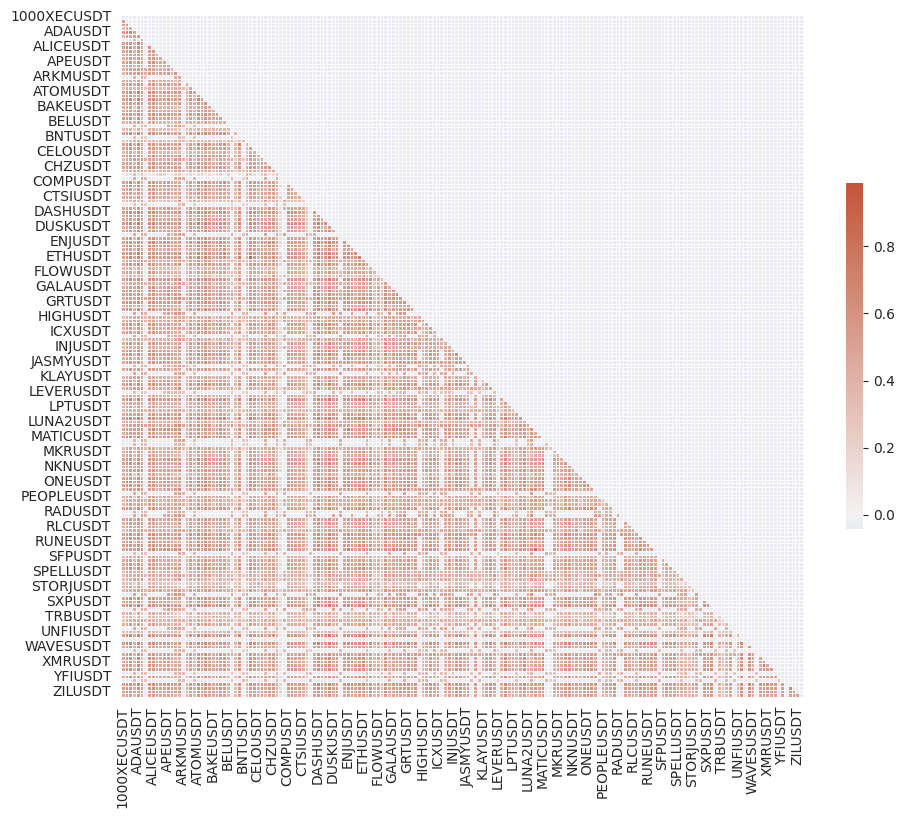

In [22]:
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(vix_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(vix_corr, mask=mask, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

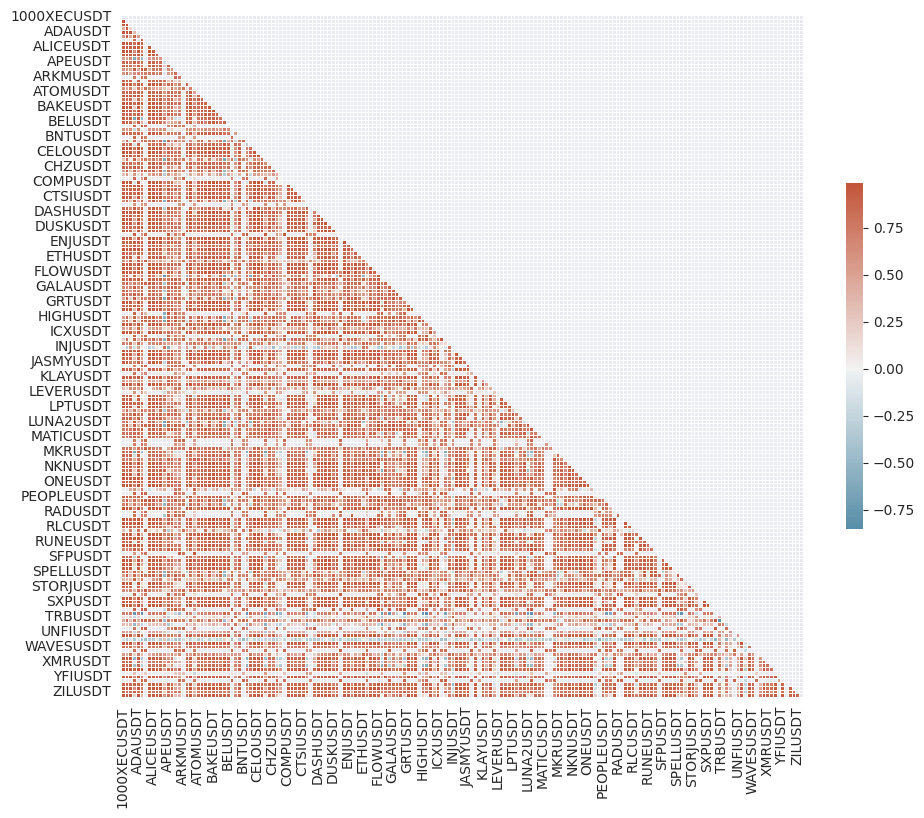

In [23]:
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(price_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(price_corr, mask=mask, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
price_corr.abs().describe().T

,count,mean,std,min,25%,50%,75%,max
1000XECUSDT,158.0,0.8052986219,0.2192920090,1.7249995588e-02,0.7135072345,0.8961917790,0.9658165086,1.0
1INCHUSDT,158.0,0.8470230718,0.1915040629,9.3125259560e-04,0.8283590089,0.9115997068,0.9652658458,1.0
AAVEUSDT,158.0,0.7811674031,0.2484846874,4.4883705905e-02,0.7130791515,0.8957342116,0.9540768271,1.0
ACHUSDT,182.0,0.6576853229,0.2690653717,1.2807484592e-03,0.4730807304,0.7365268197,0.8882690562,1.0
ADAUSDT,158.0,0.8046787551,0.2242459016,9.1306157531e-02,0.7514883245,0.8980146774,0.9654152024,1.0
...,...,...,...,...,...,...,...,...
YGGUSDT,48.0,0.7531930300,0.2086480089,5.2938517955e-16,0.7675561072,0.8179643229,0.8599256758,1.0
ZECUSDT,158.0,0.7844249165,0.1990872363,1.0109342518e-02,0.7729068810,0.8589477374,0.8933882103,1.0
ZENUSDT,158.0,0.8251258149,0.2042978525,1.2047167337e-01,0.7763909835,0.9134563741,0.9625019448,1.0
ZILUSDT,158.0,0.7401325578,0.1680614661,2.3480680072e-02,0.7161614779,0.7860831099,0.8286315506,1.0


In [25]:
# Create correlation matrix
corr_matrix = price_corr.fillna(1.0).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop_price = [column for column in upper.columns if any(upper[column] >= 0.95)]
print(len(to_drop_price), len(corr_matrix))

# Create correlation matrix
corr_matrix = vix_corr.fillna(1.0).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop_vix = [column for column in upper.columns if any(upper[column] >= 0.65)]
print(len(to_drop_vix), len(corr_matrix))
all_to_drop = list(set(to_drop_price + to_drop_vix))
print(len(all_to_drop), len(corr_matrix))

symbols_df2 = [c for c in symbols_df if c not in all_to_drop]
symbols_df2

161 182
158 182
163 182


['1000XECUSDT',
 'ACHUSDT',
 'AGIXUSDT',
 'APTUSDT',
 'ARBUSDT',
 'ASTRUSDT',
 'BNXUSDT',
 'CFXUSDT',
 'CKBUSDT',
 'FETUSDT',
 'FXSUSDT',
 'HIGHUSDT',
 'LQTYUSDT',
 'MINAUSDT',
 'RNDRUSDT',
 'SSVUSDT',
 'STXUSDT',
 'TRUUSDT',
 'USDCUSDT']

In [26]:
# Create correlation matrix
corr_matrix = price_corr.fillna(1.0).abs()
# corr_matrix = (corr_matrix - corr_matrix.mean()) / corr_matrix.std()
corr_matrix = (corr_matrix - corr_matrix.min()) / (corr_matrix.max() - - corr_matrix.min())
mixed_matrix = corr_matrix.copy()

corr_matrix = vix_corr.fillna(1.0).abs()
# corr_matrix = (corr_matrix - corr_matrix.mean()) / corr_matrix.std()
corr_matrix = (corr_matrix - corr_matrix.min()) / (corr_matrix.max() - - corr_matrix.min())
mixed_matrix = 0.5 * (mixed_matrix + corr_matrix.copy())

corr_matrix = mixed_matrix.copy()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop_mix = [column for column in upper.columns if any(upper[column] >= 0.65)]
print(len(to_drop_mix), len(corr_matrix), len(corr_matrix) - len(to_drop_mix))

symbols_df3 = [c for c in symbols_df if c not in to_drop_mix]
symbols_df3

166 182 16


['1000XECUSDT',
 'ACHUSDT',
 'AGIXUSDT',
 'ARBUSDT',
 'ASTRUSDT',
 'BNXUSDT',
 'CFXUSDT',
 'COCOSUSDT',
 'FETUSDT',
 'FXSUSDT',
 'HIGHUSDT',
 'LQTYUSDT',
 'RNDRUSDT',
 'STXUSDT',
 'TRUUSDT',
 'USDCUSDT']

In [27]:

symbols_to_use = symbols_df3
price_corr_f = pd.DataFrame(columns=symbols_to_use, index=symbols_to_use, dtype=float)
vix_corr_f = pd.DataFrame(columns=symbols_to_use, index=symbols_to_use, dtype=float)
for i, (sym1, sym2) in enumerate(list(combinations(symbols_to_use, 2))):
    s1 = data_df[sym1]["price"]
    s2 = data_df[sym2]["price"]
    if pd.notna(s1 + s2).mean() >= 0.35:
        p = s1.corr(s2)
        price_corr_f.at[sym1, sym2] = p
        price_corr_f.at[sym2, sym1] = p

        s1 = data_df[sym1]["volatility"]
        s2 = data_df[sym2]["volatility"]
        v = s1.corr(s2)
        vix_corr_f.at[sym1, sym2] = v
        vix_corr_f.at[sym2, sym1] = v
    else:
        price_corr_f.at[sym1, sym2] = np.nan
        price_corr_f.at[sym2, sym1] = np.nan

        vix_corr_f.at[sym1, sym2] = np.nan
        vix_corr_f.at[sym2, sym1] = np.nan

In [28]:
for i in range(len(vix_corr_f)):
    price_corr_f.iloc[i, i] = 1.0
    vix_corr_f.iloc[i, i] = 1.0

<AxesSubplot:>

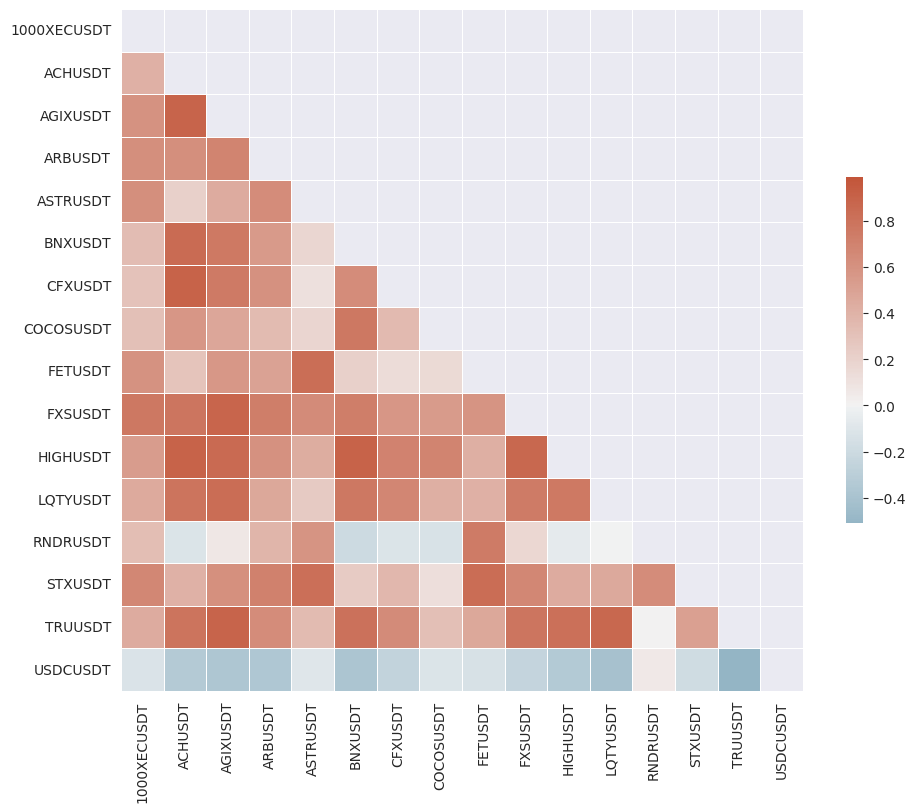

In [29]:
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(price_corr_f, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(price_corr_f, mask=mask, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

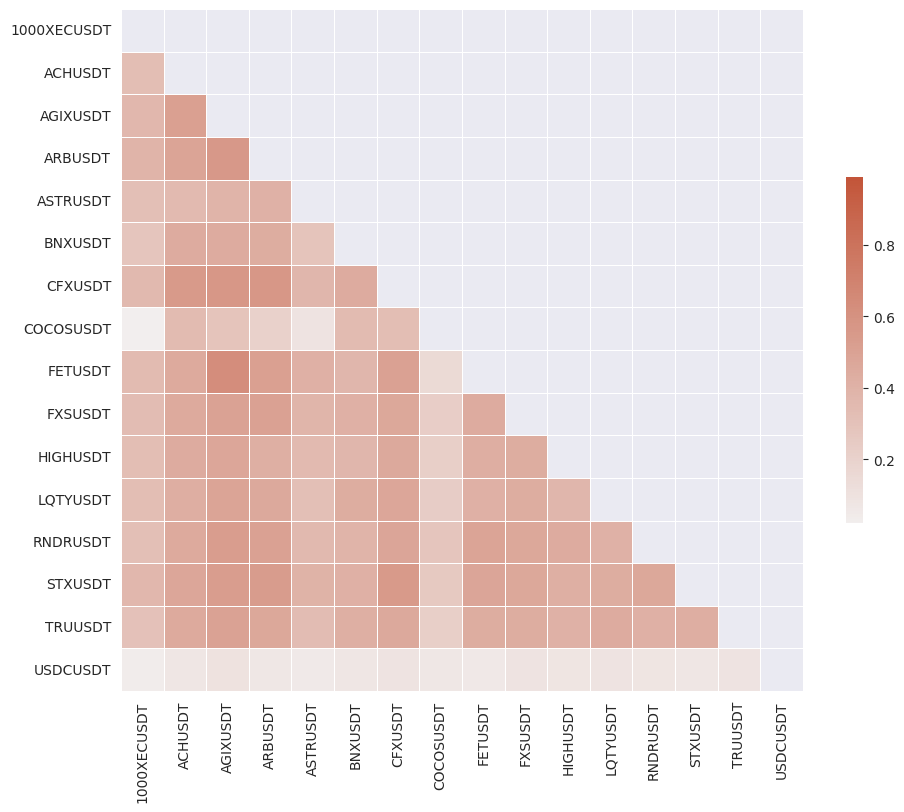

In [30]:
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(vix_corr_f, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(vix_corr_f, mask=mask, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
print("\n".join(symbols_to_use))

1000XECUSDT
ACHUSDT
AGIXUSDT
ARBUSDT
ASTRUSDT
BNXUSDT
CFXUSDT
COCOSUSDT
FETUSDT
FXSUSDT
HIGHUSDT
LQTYUSDT
RNDRUSDT
STXUSDT
TRUUSDT
USDCUSDT


## Cherry picking

### Highest volatility

In [32]:
samples = 10

volatility_dict = {}
for k in data_df.keys():
    volatility_dict[k] = data_df[k]["volatility"].describe()
    # break

volatility_df = pd.DataFrame(volatility_dict)
volatility_df

,1000XECUSDT,1INCHUSDT,AAVEUSDT,ACHUSDT,ADAUSDT,AGIXUSDT,AGLDUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,...,XMRUSDT,XRPUSDT,XTZUSDT,XVGUSDT,YFIUSDT,YGGUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
count,1.1764800000e+06,1.1764800000e+06,1.1764800000e+06,459930.0000000000,1.1764800000e+06,468585.0000000000,234570.0000000000,1.1764800000e+06,1.1764800000e+06,1.1764800000e+06,...,1.1764800000e+06,1.1764800000e+06,1.1764800000e+06,268560.0000000000,1.1764800000e+06,224430.0000000000,1.1764800000e+06,1.1764800000e+06,1.1764800000e+06,1.1764800000e+06
mean,1.4554247389e-03,1.5526957449e-03,1.6808444107e-03,0.0016784320,1.4782364342e-03,0.0017589266,0.0019494765,1.6765241356e-03,1.9282721045e-03,1.8073678250e-03,...,1.1853133723e-03,1.3539086533e-03,1.7148739574e-03,0.0015926206,1.5404577963e-03,0.0022997389,1.5529281105e-03,1.6926433670e-03,1.6537924087e-03,1.6343586894e-03
std,1.7824416721e-03,1.6797027081e-03,1.6342252944e-03,0.0018439064,1.3739522812e-03,0.0017755815,0.0023948997,1.5443459954e-03,1.8773746352e-03,1.8786152108e-03,...,1.2081574012e-03,1.4621938354e-03,1.4374455815e-03,0.0020671699,1.6568830950e-03,0.0030698302,1.5761863095e-03,1.7191892021e-03,1.8077025542e-03,1.8090558274e-03
min,0.0000000000e+00,0.0000000000e+00,0.0000000000e+00,0.0000000000,0.0000000000e+00,0.0000000000,0.0000000000,0.0000000000e+00,0.0000000000e+00,0.0000000000e+00,...,0.0000000000e+00,0.0000000000e+00,0.0000000000e+00,0.0000000000,0.0000000000e+00,0.0000000000,0.0000000000e+00,0.0000000000e+00,0.0000000000e+00,0.0000000000e+00
25%,5.1948051948e-04,6.9589422408e-04,7.4261102035e-04,0.0007153076,7.4497144276e-04,0.0008445946,0.0008037293,8.8573959256e-04,9.3632958802e-04,8.3892617450e-04,...,4.8430058923e-04,6.3184498736e-04,9.9700897308e-04,0.0006000600,6.4699792961e-04,0.0010000000,6.6711140761e-04,7.4773208904e-04,6.5681444992e-04,6.4935064935e-04
50%,1.0090817356e-03,1.1716461629e-03,1.2749681258e-03,0.0012978585,1.1325028313e-03,0.0013215859,0.0014227132,1.3071895425e-03,1.4625022854e-03,1.3951866062e-03,...,8.6707129994e-04,1.0196278358e-03,1.3800717637e-03,0.0011462632,1.1365788975e-03,0.0016778523,1.1493451479e-03,1.2885664618e-03,1.2027904739e-03,1.1706175007e-03
75%,1.7703935721e-03,1.9204389575e-03,2.1008403361e-03,0.0020636488,1.7941242431e-03,0.0021759403,0.0024088094,2.0491803279e-03,2.4038461538e-03,2.2346368715e-03,...,1.4835068721e-03,1.6168148747e-03,2.1186440678e-03,0.0019220209,1.8927444795e-03,0.0026842740,1.9528764984e-03,2.1146078284e-03,1.9809825674e-03,1.9817677368e-03
max,1.9779044904e-01,1.7164695743e-01,1.3238700641e-01,0.1277456647,9.5025336457e-02,0.1646074133,0.2227616469,2.6077826922e-01,1.6980990870e-01,2.0672514620e-01,...,6.9976922504e-02,1.4112587959e-01,9.2255125285e-02,0.1329458772,1.2136432660e-01,0.3690937258,1.7688888889e-01,1.4101188569e-01,1.0654685494e-01,1.2879581152e-01


In [33]:
volatility_df.T

,count,mean,std,min,25%,50%,75%,max
1000XECUSDT,1176480.0,0.0014554247,0.0017824417,0.0,0.0005194805,0.0010090817,0.0017703936,0.1977904490
1INCHUSDT,1176480.0,0.0015526957,0.0016797027,0.0,0.0006958942,0.0011716462,0.0019204390,0.1716469574
AAVEUSDT,1176480.0,0.0016808444,0.0016342253,0.0,0.0007426110,0.0012749681,0.0021008403,0.1323870064
ACHUSDT,459930.0,0.0016784320,0.0018439064,0.0,0.0007153076,0.0012978585,0.0020636488,0.1277456647
ADAUSDT,1176480.0,0.0014782364,0.0013739523,0.0,0.0007449714,0.0011325028,0.0017941242,0.0950253365
...,...,...,...,...,...,...,...,...
YGGUSDT,224430.0,0.0022997389,0.0030698302,0.0,0.0010000000,0.0016778523,0.0026842740,0.3690937258
ZECUSDT,1176480.0,0.0015529281,0.0015761863,0.0,0.0006671114,0.0011493451,0.0019528765,0.1768888889
ZENUSDT,1176480.0,0.0016926434,0.0017191892,0.0,0.0007477321,0.0012885665,0.0021146078,0.1410118857
ZILUSDT,1176480.0,0.0016537924,0.0018077026,0.0,0.0006568144,0.0012027905,0.0019809826,0.1065468549


In [34]:
volatility_symbols = volatility_df.T.sort_values("50%", ascending=False).iloc[:samples].index.tolist()
volatility_df.T.sort_values("50%", ascending=False).iloc[:samples]

,count,mean,std,min,25%,50%,75%,max
CRVUSDT,1176480.0,0.0024913010,0.0018407376,0.0,0.0014745638,0.0020876827,0.0030674847,0.2383966245
CELOUSDT,1176480.0,0.0022905735,0.0017959633,0.0,0.0013550136,0.0019900498,0.0027452928,0.3761878144
LINAUSDT,1176480.0,0.0023564862,0.0021140846,0.0,0.0012406948,0.0018975332,0.0028169014,0.1456953642
STMXUSDT,1176480.0,0.0022017755,0.0019987589,0.0,0.0012738854,0.0018726592,0.0027472527,0.3714773698
WLDUSDT,241200.0,0.0023871745,0.0024515294,0.0,0.0011904102,0.0018301261,0.0028328612,0.2271066208
DYDXUSDT,1176480.0,0.0022960497,0.0020851624,0.0,0.0011591963,0.0017931859,0.0027950705,0.1440168370
SEIUSDT,207210.0,0.0024563099,0.0026284340,0.0,0.0009132420,0.0017543860,0.0030627871,0.1764159703
CYBERUSDT,200880.0,0.0024642359,0.0032544308,0.0,0.0010096931,0.0016997167,0.0028295659,0.3569682152
FLOWUSDT,1003470.0,0.0019831472,0.0017465154,0.0,0.0010482180,0.0016972908,0.0023923445,0.1783166904
LITUSDT,1176480.0,0.0022842389,0.0022966917,0.0,0.0012210012,0.0016930023,0.0028129395,0.1371742112


## Highest anti-correlation

In [35]:
price_corr_t = price_corr.where(np.logical_not(np.eye(price_corr.shape[0], price_corr.shape[1]).astype(bool)), np.nan)
price_corr_t

,1000XECUSDT,1INCHUSDT,AAVEUSDT,ACHUSDT,ADAUSDT,AGIXUSDT,AGLDUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,...,XMRUSDT,XRPUSDT,XTZUSDT,XVGUSDT,YFIUSDT,YGGUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
1000XECUSDT,NaN,0.9769695040,0.9679626619,0.4148572157,0.9842072263,0.6010614000,NaN,0.9635476704,0.9234733369,0.9803607235,...,0.8598176322,0.8515554701,0.9757637034,NaN,0.9273143300,NaN,0.8769840560,0.9625627288,0.8409827593,0.9544166928
1INCHUSDT,0.9769695040,NaN,0.9588314087,0.9292763148,0.9732573680,0.9230306344,NaN,0.9749170959,0.9462555990,0.9822105588,...,0.8193628706,0.8234402819,0.9659657024,NaN,0.9297435756,NaN,0.8789647762,0.9738483156,0.8049824425,0.9431241455
AAVEUSDT,0.9679626619,0.9588314087,NaN,0.1890627611,0.9759850146,0.4438353033,NaN,0.9526287895,0.9132817067,0.9604576244,...,0.8902617203,0.8685021029,0.9589539998,NaN,0.9537238915,NaN,0.8626403041,0.9416218261,0.8499222663,0.9615255440
ACHUSDT,0.4148572157,0.9292763148,0.1890627611,NaN,0.3710645623,0.8939813691,0.8396699907,0.8412234163,0.9338186585,0.6589286636,...,0.0732891972,-0.4149426938,0.9161976185,0.3058856504,0.6636438454,0.859478621,0.9099574656,0.6308985261,0.9253326316,0.2042926408
ADAUSDT,0.9842072263,0.9732573680,0.9759850146,0.3710645623,NaN,0.5338899774,NaN,0.9729153907,0.9303167978,0.9741318498,...,0.8379288577,0.8559619449,0.9810743126,NaN,0.9526425376,NaN,0.8746557793,0.9597906222,0.8235010717,0.9562519212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YGGUSDT,NaN,NaN,NaN,0.8594786210,NaN,0.8406667123,0.8044418045,NaN,NaN,NaN,...,NaN,NaN,NaN,0.4984104921,NaN,NaN,NaN,NaN,NaN,NaN
ZECUSDT,0.8769840560,0.8789647762,0.8626403041,0.9099574656,0.8746557793,0.8235336510,NaN,0.8992846913,0.9147336994,0.8462141994,...,0.7805696519,0.7242472149,0.9060669388,NaN,0.8755030113,NaN,NaN,0.9228283563,0.8699397039,0.9100049406
ZENUSDT,0.9625627288,0.9738483156,0.9416218261,0.6308985261,0.9597906222,0.7493496154,NaN,0.9773295620,0.9835306028,0.9705729022,...,0.8096446158,0.8326981549,0.9568573444,NaN,0.9322883573,NaN,0.9228283563,NaN,0.8022962147,0.9535713341
ZILUSDT,0.8409827593,0.8049824425,0.8499222663,0.9253326316,0.8235010717,0.8977852502,NaN,0.7924400203,0.7697188013,0.7922169094,...,0.8263042638,0.6641473989,0.8349059679,NaN,0.7860006924,NaN,0.8699397039,0.8022962147,NaN,0.8740300649


In [36]:
corr_desc = price_corr_t.describe().T
corr_desc

,count,mean,std,min,25%,50%,75%,max
1000XECUSDT,157.0,0.8016370783,0.2281790146,-0.1279632577,0.7129794096,0.8961099285,0.9653318439,0.9872776635
1INCHUSDT,157.0,0.8365337511,0.2299352797,-0.3462090805,0.8280399345,0.9108749253,0.9648229436,0.9882379694
AAVEUSDT,157.0,0.7783196495,0.2532022280,-0.1141323595,0.7120580839,0.8948122808,0.9537238915,0.9759850146
ACHUSDT,181.0,0.5813735843,0.4058644093,-0.7784536383,0.4082166553,0.7343246262,0.8864116735,0.9536413972
ADAUSDT,157.0,0.8022715349,0.2285652795,-0.0913061575,0.7467666275,0.8975182548,0.9653382347,0.9875775292
...,...,...,...,...,...,...,...,...
YGGUSDT,47.0,0.7379561515,0.2414295699,-0.2346631590,0.7612598160,0.8179630229,0.8593686114,0.9107223358
ZECUSDT,157.0,0.7654493772,0.2588863561,-0.4969886160,0.7727999722,0.8586802211,0.8930846796,0.9558509633
ZENUSDT,157.0,0.8162479749,0.2337188048,-0.2200777006,0.7745875072,0.9133034040,0.9623195927,0.9889712883
ZILUSDT,157.0,0.7315032801,0.1957230921,-0.2800312477,0.7159641704,0.7860006924,0.8284143080,0.9684024652


In [37]:
low_corr_symbols = corr_desc.loc[corr_desc["count"] >= 100].sort_values("50%", ascending=True).iloc[:samples].index.to_list()
low_corr_symbols = [c for c in low_corr_symbols if c != "USDCUSDT"][:samples]
print(low_corr_symbols)
corr_desc.loc[corr_desc["count"] >= 100].sort_values("50%", ascending=True)

['INJUSDT', 'TRBUSDT', 'RNDRUSDT', 'TRXUSDT', 'OPUSDT', 'COCOSUSDT', 'STGUSDT', 'UNFIUSDT', 'LDOUSDT']


,count,mean,std,min,25%,50%,75%,max
USDCUSDT,181.0,-0.2109840562,0.1649665995,-0.5125713708,-0.3382346756,-0.2470063088,-0.1155737183,0.3986681956
INJUSDT,173.0,0.1503236600,0.3887684535,-0.5668899336,-0.1888417165,0.0745329333,0.5017127892,0.9076390945
TRBUSDT,157.0,0.1315254913,0.2149620543,-0.3758035213,0.0241296674,0.1164719546,0.1982369498,0.8742830128
RNDRUSDT,181.0,0.3009628660,0.3276334938,-0.3249437872,0.0101584337,0.2842239271,0.5599663538,0.9144184199
TRXUSDT,157.0,0.2019174040,0.3144283463,-0.6518371686,0.0695005859,0.2895895560,0.4032596864,0.8364959354
...,...,...,...,...,...,...,...,...
AUDIOUSDT,157.0,0.8455408286,0.2095828597,-0.2738237121,0.8437111133,0.9163200471,0.9691962064,0.9897334501
C98USDT,157.0,0.8419494917,0.2204068133,-0.2490436160,0.8220854142,0.9165944318,0.9730617344,0.9923047837
AXSUSDT,157.0,0.8490463385,0.2193679073,-0.2973798715,0.8485963794,0.9186512282,0.9707463902,0.9913089378
THETAUSDT,157.0,0.8468290781,0.1908939298,-0.2419661405,0.7808908020,0.9205585900,0.9744520417,0.9928196926


## Highest correlation variance

In [38]:
std_corr_symbols = corr_desc.loc[corr_desc["count"] >= 100].sort_values("std", ascending=False).iloc[:samples].index.to_list()
std_corr_symbols = [c for c in std_corr_symbols if c != "USDCUSDT"][:samples]
print(std_corr_symbols)
corr_desc.loc[corr_desc["count"] >= 100].sort_values("std", ascending=False)

['TOMOUSDT', 'BCHUSDT', 'XLMUSDT', 'MKRUSDT', 'FOOTBALLUSDT', 'LUNA2USDT', 'XRPUSDT', 'ANTUSDT', 'HOOKUSDT', 'SPELLUSDT']


,count,mean,std,min,25%,50%,75%,max
TOMOUSDT,157.0,0.4096273200,0.5287915168,-0.8535832775,0.2981695382,0.6833167696,0.7532692158,0.8861912455
BCHUSDT,157.0,0.5765622395,0.5052694918,-0.6752032713,0.4169820323,0.8546587297,0.9073183364,0.9584923737
XLMUSDT,157.0,0.6434423938,0.4717639332,-0.5566052673,0.5411186050,0.8906110296,0.9521705902,0.9787854804
MKRUSDT,157.0,0.5865463686,0.4702820913,-0.6995870593,0.4962836784,0.8352641479,0.8786707235,0.9440763822
FOOTBALLUSDT,173.0,0.3724290267,0.4687535328,-0.7939550101,0.0506321259,0.5155457340,0.7733416810,0.9546194362
...,...,...,...,...,...,...,...,...
KNCUSDT,157.0,0.4785406902,0.1890335696,-0.2456718600,0.4170677894,0.4913771876,0.5657330283,0.9339230318
HOTUSDT,157.0,0.8372821473,0.1861152985,-0.2146631923,0.7711360205,0.9054824610,0.9584284924,0.9898594843
DENTUSDT,157.0,0.8435787184,0.1857498289,-0.2448284297,0.7956119792,0.9148142273,0.9701413656,0.9948037871
CHRUSDT,157.0,0.7930797609,0.1719473844,-0.2306629902,0.7558106997,0.8454045953,0.8870385448,0.9745997554


In [39]:
print("\n".join(list(set(std_corr_symbols + low_corr_symbols + volatility_symbols))))

LDOUSDT
XLMUSDT
STMXUSDT
CYBERUSDT
FOOTBALLUSDT
OPUSDT
INJUSDT
CRVUSDT
SPELLUSDT
RNDRUSDT
SEIUSDT
WLDUSDT
BCHUSDT
COCOSUSDT
UNFIUSDT
LITUSDT
MKRUSDT
CELOUSDT
DYDXUSDT
HOOKUSDT
TRXUSDT
XRPUSDT
FLOWUSDT
LUNA2USDT
TRBUSDT
ANTUSDT
TOMOUSDT
LINAUSDT
STGUSDT


In [40]:
[c for c in corr_desc.index if "GLD" in c]

['AGLDUSDT', 'EGLDUSDT']

In [41]:
print("std_corr_symbols", std_corr_symbols)
print("low_corr_symbols", low_corr_symbols)
print("volatility_symbols", volatility_symbols)


std_corr_symbols ['TOMOUSDT', 'BCHUSDT', 'XLMUSDT', 'MKRUSDT', 'FOOTBALLUSDT', 'LUNA2USDT', 'XRPUSDT', 'ANTUSDT', 'HOOKUSDT', 'SPELLUSDT']
low_corr_symbols ['INJUSDT', 'TRBUSDT', 'RNDRUSDT', 'TRXUSDT', 'OPUSDT', 'COCOSUSDT', 'STGUSDT', 'UNFIUSDT', 'LDOUSDT']
volatility_symbols ['CRVUSDT', 'CELOUSDT', 'LINAUSDT', 'STMXUSDT', 'WLDUSDT', 'DYDXUSDT', 'SEIUSDT', 'CYBERUSDT', 'FLOWUSDT', 'LITUSDT']
